# **Online Retail Transactions Visualisation**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\fanxi\\OneDrive\\Documents\\Code projects\\Hackathon-group4\\online-retail-transactions-analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\fanxi\\OneDrive\\Documents\\Code projects\\Hackathon-group4\\online-retail-transactions-analysis'

---

# Initial Setup

Import neccessary python libaries

In [ ]:
# Data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Statistical analysis libraries
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import skewnorm
from scipy.stats import f_oneway
from scipy.stats import kruskal

Fetch dataset from compressed csv file

In [6]:
df = pd.read_csv("DataSet/Cleaned/fact_sales_clean.zip", compression='zip')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Home-Light,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Home-Light,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Drinkware,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Bottles,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Romance,Wednesday,8


---

# Descriptive Statistics

Section 1 content

In [ ]:
# DataFrame info and shape
print("DataFrame Info:")
df.info()

print("\nDataFrame Shape:")
print(df.shape)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534684 entries, 0 to 534683
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        534684 non-null  object 
 1   StockCode        534684 non-null  object 
 2   Description      534684 non-null  object 
 3   Quantity         534684 non-null  int64  
 4   InvoiceDate      534684 non-null  object 
 5   UnitPrice        534684 non-null  float64
 6   CustomerID       534684 non-null  int64  
 7   Country          534684 non-null  object 
 8   TotalSales       534684 non-null  float64
 9   ProductCategory  534684 non-null  object 
 10  DayOfWeek        534684 non-null  object 
 11  Hour             534684 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 49.0+ MB

DataFrame Shape:
(534684, 12)


"InvoiceDate" has a object dtype. Would be better to convert to datetime

In [ ]:
# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534684 entries, 0 to 534683
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        534684 non-null  object        
 1   StockCode        534684 non-null  object        
 2   Description      534684 non-null  object        
 3   Quantity         534684 non-null  int64         
 4   InvoiceDate      534684 non-null  datetime64[ns]
 5   UnitPrice        534684 non-null  float64       
 6   CustomerID       534684 non-null  int64         
 7   Country          534684 non-null  object        
 8   TotalSales       534684 non-null  float64       
 9   ProductCategory  534684 non-null  object        
 10  DayOfWeek        534684 non-null  object        
 11  Hour             534684 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 49.0+ MB


In [ ]:
# Numeric columns summary
print("Numeric Columns Summary:")
print(df.describe())

Numeric Columns Summary:
            Quantity                    InvoiceDate      UnitPrice  \
count  534684.000000                         534684  534684.000000   
mean        9.673600  2011-07-04 11:15:02.198532096       4.646824   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:14:45       1.250000   
50%         3.000000            2011-07-19 15:23:00       2.080000   
75%        10.000000            2011-10-19 09:58:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       219.161905                            NaN      97.410535   

          CustomerID     TotalSales           Hour  
count  534684.000000  534684.000000  534684.000000  
mean    15283.334714      18.178914      13.075319  
min     12346.000000 -168469.600000       6.000000  
25%     14357.000000       3.750000      11.000000  
50%     15287.000000       9.900000      13.000000  
75%     16244.000000      

In [ ]:
# Categorical columns summary
print("\nCategorical Columns Summary:")
print(df.describe(include="object"))


Categorical Columns Summary:
       InvoiceNo StockCode                         Description  \
count     534684    534684                              534684   
unique     24428      3958                                4211   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2301                                2357   

               Country ProductCategory DayOfWeek  
count           534684          534684    534684  
unique              36              30         6  
top     United Kingdom       Gift-Wrap  Thursday  
freq            488846          105496    102529  


In [ ]:
# Check for unique values in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} has {df[col].nunique()} unique values')

InvoiceNo has 24428 unique values
StockCode has 3958 unique values
Description has 4211 unique values
Country has 36 unique values
ProductCategory has 30 unique values
DayOfWeek has 6 unique values


---

# Time Based Trend Analysis

## Monthly Data

In [12]:
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Home-Light,Wednesday,8,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Home-Light,Wednesday,8,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Drinkware,Wednesday,8,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Bottles,Wednesday,8,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Romance,Wednesday,8,12


In [13]:
df_returns = df[df['TotalSales']<0]
df_returns.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,Other,Wednesday,9,12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,Multi-packs,Wednesday,9,12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,First-Aid,Wednesday,10,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,Multi-packs,Wednesday,10,12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,Multi-packs,Wednesday,10,12


In [14]:
df_monthly = (
    df
    .groupby(df['Month'])
    .agg(Sales=('TotalSales', 'sum'),
         TrasactionsCount=('InvoiceNo', 'nunique'),
         ReturnsCount=('TotalSales', lambda x: (x < 0).sum()))
    .reset_index()
)
df_monthly

,Month,Sales,TrasactionsCount,ReturnsCount
0,1,558448.560,1362,700
1,2,497026.410,1328,470
2,3,682013.980,1818,696
3,4,491877.341,1516,558
4,5,721038.230,2022,621
5,6,689367.900,1917,708
6,7,678061.081,1767,684
7,8,680855.430,1653,669
8,9,1017312.382,2227,801
9,10,1069368.230,2533,1194


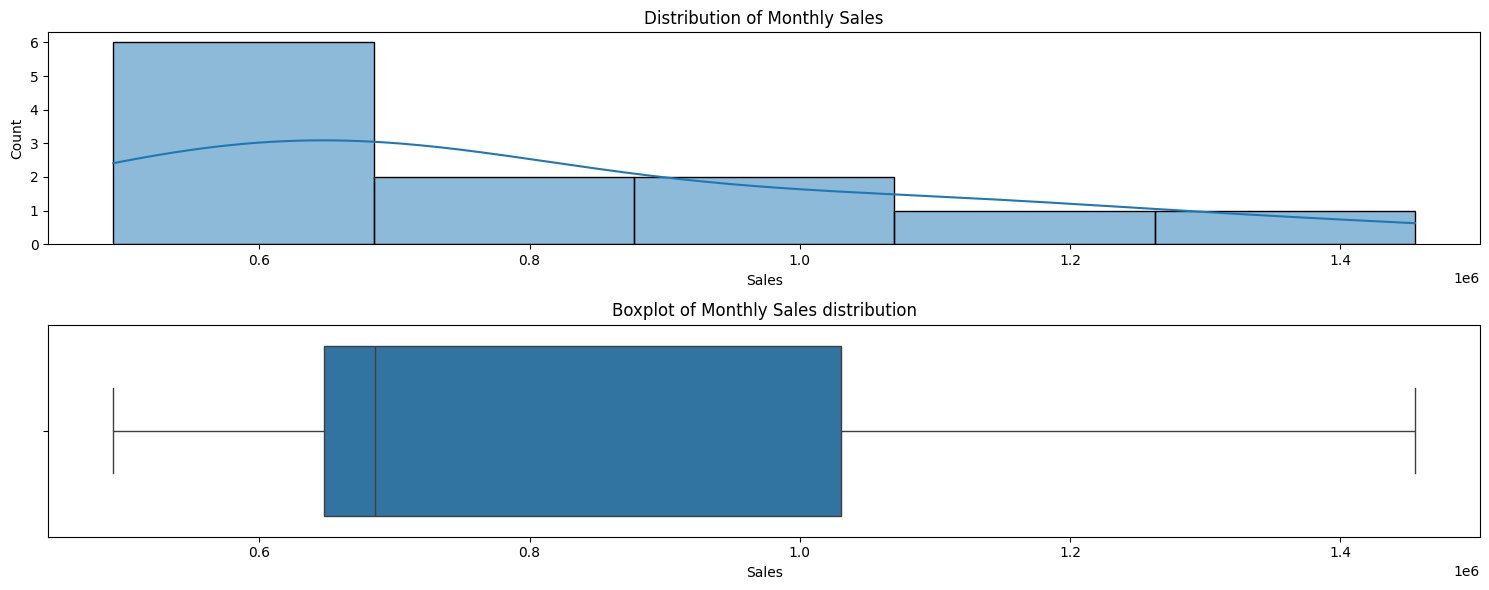

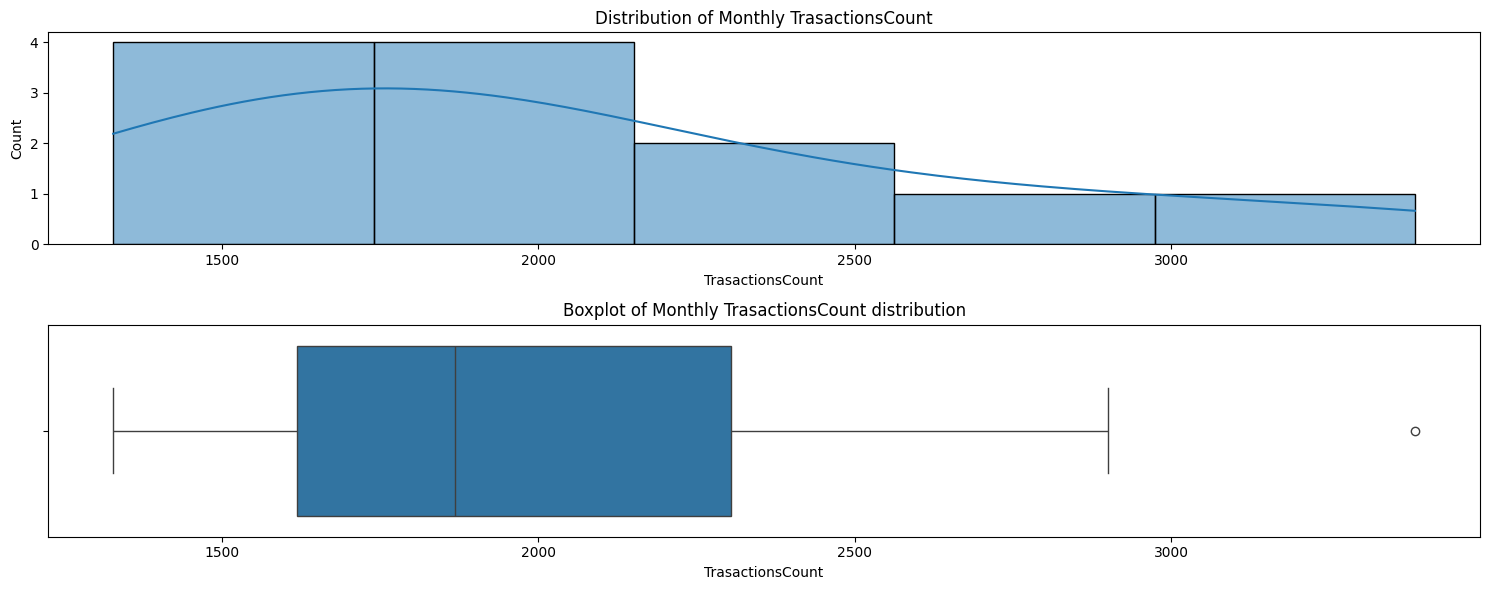

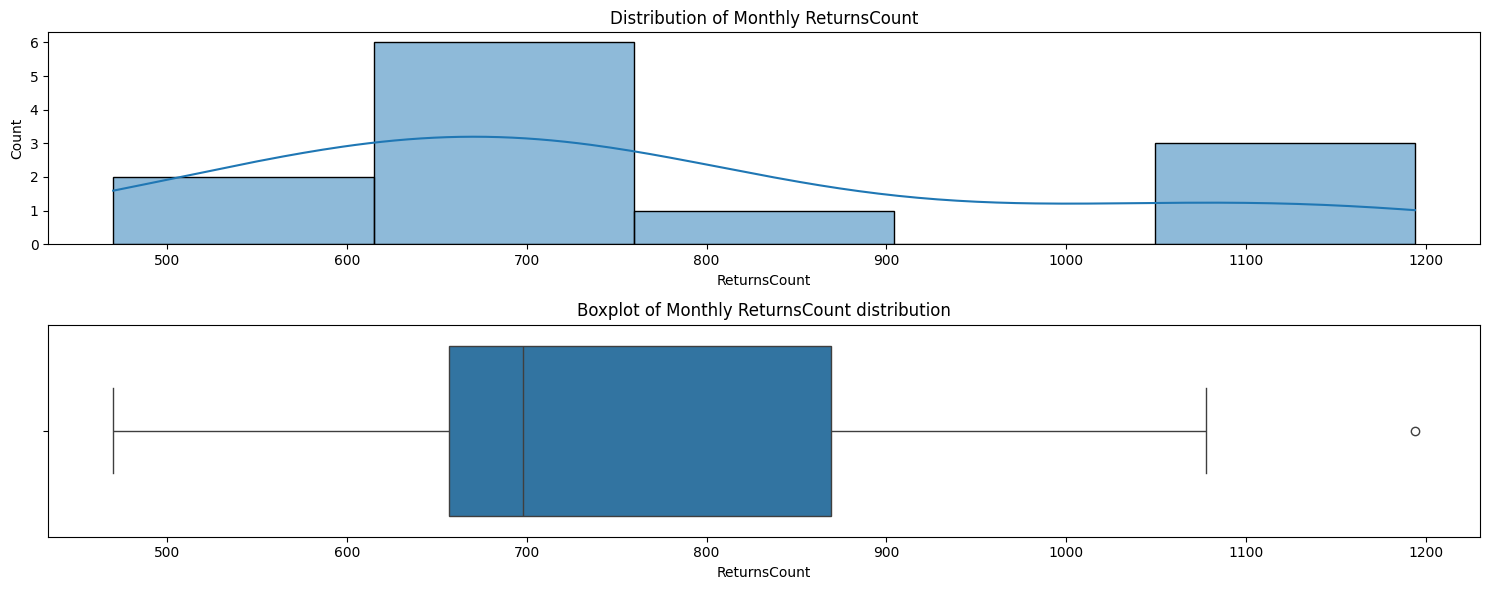

In [15]:
for col in df_monthly.columns[1:]:
    fig, ax = plt.subplots(2, 1, figsize=(15, 6))
    sns.histplot(df_monthly[col], kde=True, ax = ax[0])
    ax[0].set_title(f'Distribution of Monthly {col}')
    sns.boxplot(x=df_monthly[col], ax = ax[1])
    ax[1].set_title(f'Boxplot of Monthly {col} distribution')
    plt.tight_layout()
    plt.show()

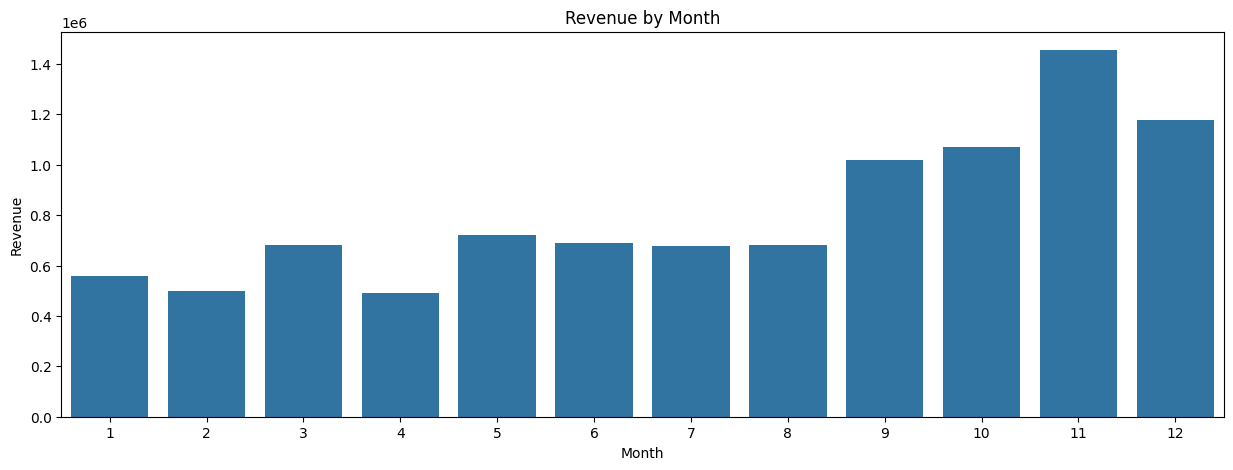

In [16]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_monthly, x='Month', y='Sales')
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [17]:
df_weekdays = (
    df.groupby(df['DayOfWeek'])
    .agg(TotalSales = ('TotalSales', 'sum'),
          AverageSales = ('TotalSales', 'mean'))
    .reset_index()
)
df_weekdays

,DayOfWeek,TotalSales,AverageSales
0,Friday,1537055.891,18.959848
1,Monday,1583834.391,16.812101
2,Sunday,798272.411,12.713976
3,Thursday,2106396.810,20.544400
4,Tuesday,1964659.531,19.507313
5,Wednesday,1729755.230,18.524425


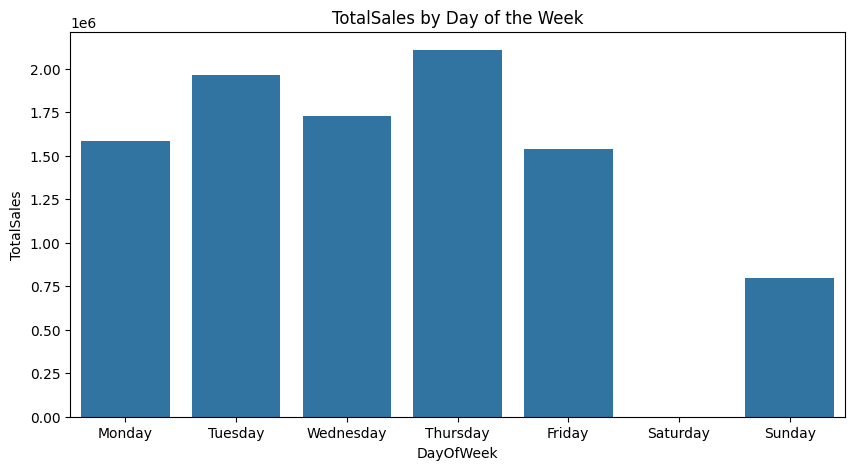

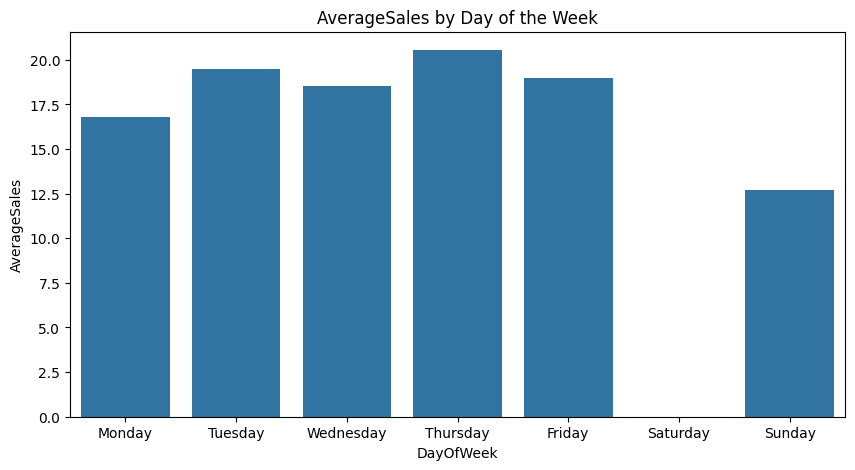

In [18]:
for col in df_weekdays.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_weekdays, x='DayOfWeek', y=col, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title(f'{col} by Day of the Week')
    plt.show()

In [19]:
df_hourly = (
    df.groupby(df['Hour'])
    .agg(TotalSales = ('TotalSales', 'sum'),
          TransactionCount = ('InvoiceNo', 'count'),
          ReturnsCount = ('TotalSales', lambda x: (x < 0).sum()))
    .reset_index()
)
df_hourly

,Hour,TotalSales,TransactionCount,ReturnsCount
0,6,-497.350,41,40
1,7,31009.320,383,4
2,8,281723.020,8903,102
3,9,766280.621,34223,523
4,10,1325875.591,48607,1005
5,11,1146457.490,56793,1188
6,12,1356923.770,77324,1336
7,13,1172205.450,71081,1059
8,14,1090776.191,66327,1010
9,15,1185780.950,76633,893


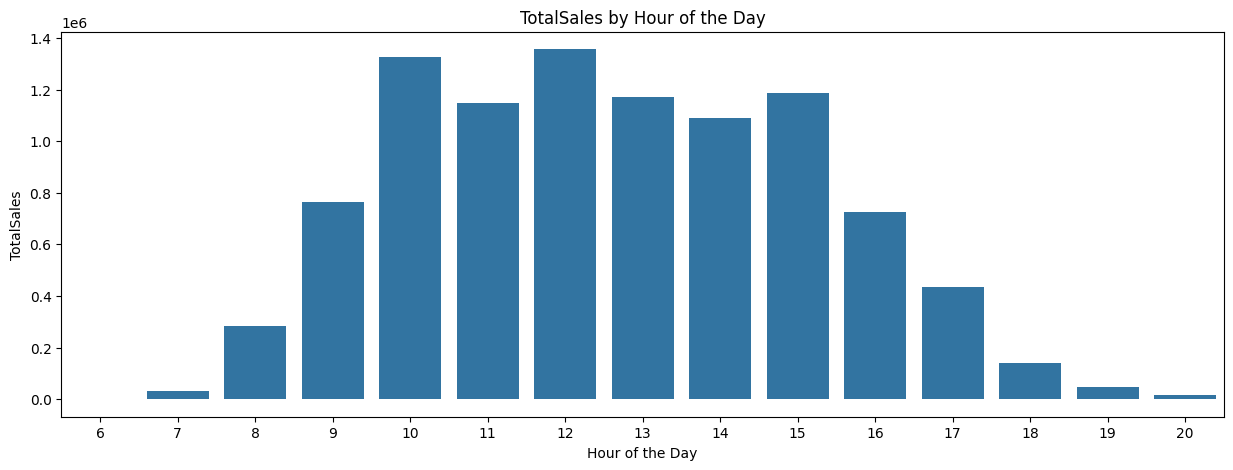

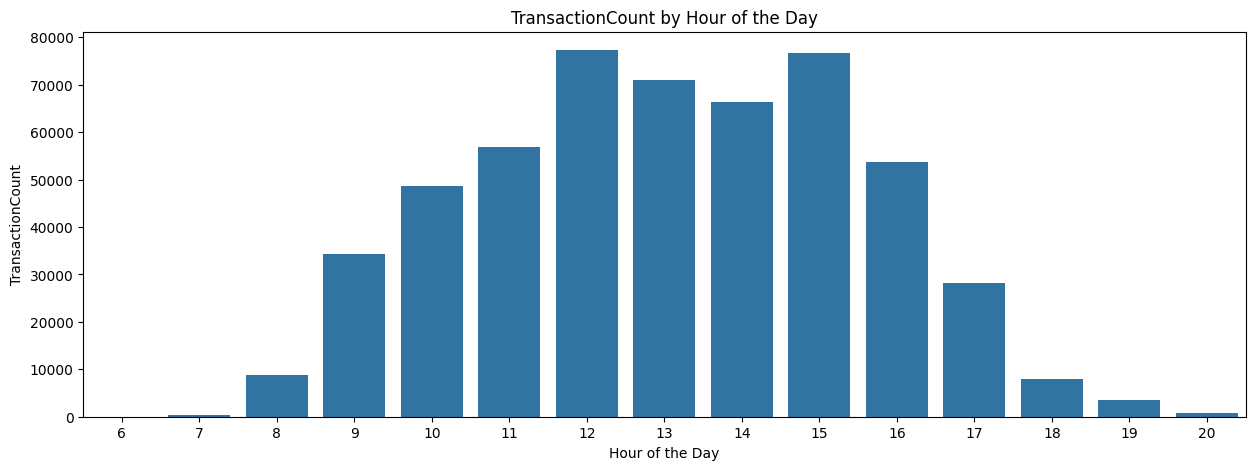

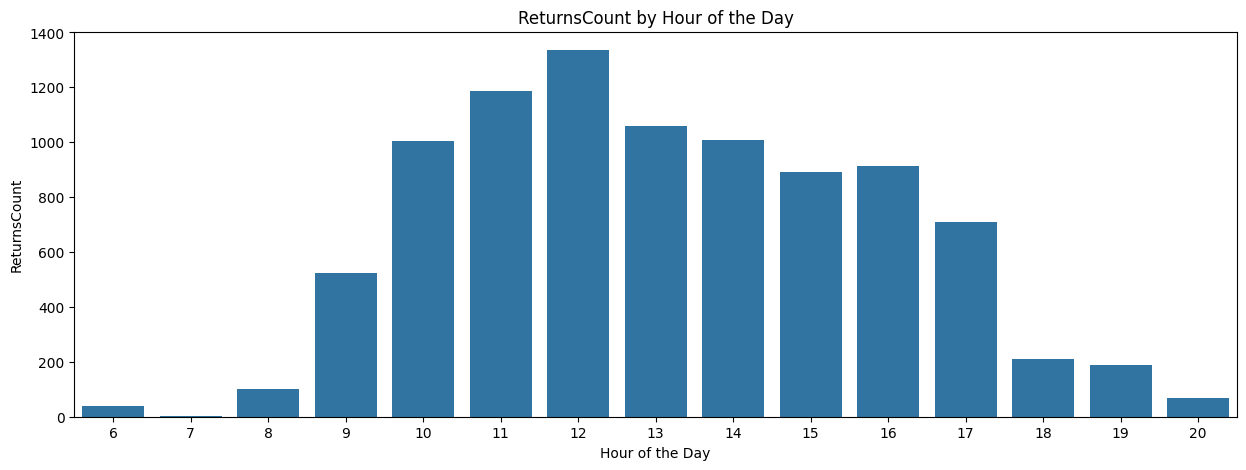

In [20]:
for col in df_hourly.columns[1:]:
    plt.figure(figsize=(15, 5))
    sns.barplot(data=df_hourly, x='Hour', y=col)
    plt.title(f"{col} by Hour of the Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel(f'{col}')
    plt.show()

---

# Customer Segmentation

In [21]:
df_users =(
    df.groupby(df['CustomerID'])
    .agg(TotalSpendings=('TotalSales', 'sum'),
         AvgSpendings=('TotalSales', 'mean'),
         TransactionsCount=('InvoiceNo', 'count'),
         ReturnTransactions=('TotalSales', lambda x: (x < 0).sum()),
         Country=('Country', 'first')
         )
    .reset_index()
)
df_users['Return%'] = (df_users['ReturnTransactions'] / df_users['TransactionsCount'] * 100).round(2)
df_users['TotalSpendings'] = df_users['TotalSpendings'].round(2)
df_users['AvgSpendings'] = df_users['AvgSpendings'].round(2)
df_users

,CustomerID,TotalSpendings,AvgSpendings,TransactionsCount,ReturnTransactions,Country,Return%
0,12346,0.00,0.00,2,1,United Kingdom,50.00
1,12347,4310.00,23.68,182,0,Iceland,0.00
2,12348,1797.24,57.98,31,0,Finland,0.00
3,12349,1757.55,24.08,73,0,Italy,0.00
4,12350,334.40,19.67,17,0,Norway,0.00
...,...,...,...,...,...,...,...
4362,18280,180.60,18.06,10,0,United Kingdom,0.00
4363,18281,80.82,11.55,7,0,United Kingdom,0.00
4364,18282,176.60,13.58,13,1,United Kingdom,7.69
4365,18283,2045.53,2.84,721,0,United Kingdom,0.00


In [22]:
# Loyalty analysis
# Does higher spending lead to lower return rates?
fig = px.scatter(data_frame = df_users,
                 x='TotalSpendings',
                 y='Return%', 
                #  color='TotalSpendings',
                 title='Total Spendings per Transaction vs Return Percentage of Users',
                 log_y=False, 
                 hover_data=['CustomerID', 'Country', 'TransactionsCount', 'TotalSpendings', 'AvgSpendings','ReturnTransactions', 'Return%'])

fig.show()

From the graph we can see that a few strange values and outliers:
- Some customers have a **negative** total spending value in their transactions history.
- One customer have a total spending of over 1.4 million, with over 130k transactions. Much higher than the others.

*note: CustomerID of highest spending customer is 15287* 

In [23]:
# Highest spending user
df_users[df_users['CustomerID'] == 15287]

,CustomerID,TotalSpendings,AvgSpendings,TransactionsCount,ReturnTransactions,Country,Return%
2171,15287,1445892.6,10.84,133403,382,United Kingdom,0.29


In [24]:
# Transaction history of highest spending user
biggest_spender_history = df[df['CustomerID'] == 15287]
biggest_spender_history

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour,Month
1406,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,15287,United Kingdom,2.51,Bottles,Wednesday,14,12
1407,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,15287,United Kingdom,5.02,Bottles,Wednesday,14,12
1408,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,15287,United Kingdom,3.40,Rain-Accessories,Wednesday,14,12
1409,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,15287,United Kingdom,3.32,Garden,Wednesday,14,12
1410,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,15287,United Kingdom,14.94,Gift-Wrap,Wednesday,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534318,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,15287,United Kingdom,20.65,Gift-Wrap,Friday,10,12
534319,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,15287,United Kingdom,16.52,Gift-Wrap,Friday,10,12
534320,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,15287,United Kingdom,4.96,Signs,Friday,10,12
534321,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,15287,United Kingdom,10.79,Home-Light,Friday,10,12


In [25]:
print(f'Number of unique Invoices: {biggest_spender_history['InvoiceNo'].nunique()}')
print(f'Total Spendings: {biggest_spender_history['TotalSales'].sum()}')

Number of unique Invoices: 2254
Total Spendings: 1445892.5999999999


There are 133403 entries of with CustomerID 15287. With 2254 numbers of transactions (Unique Invoices). Possible reasons may include: 
- Company account.
- Data entry error.
- Account sharing.
- Bugs merging multiple users into one CustomerID.

In [26]:
# Investigate users with negative total spendings
df_neg_users = df_users[df_users['TotalSpendings']<0]
df_neg_users.sort_values(by='TotalSpendings').head(10)

,CustomerID,TotalSpendings,AvgSpendings,TransactionsCount,ReturnTransactions,Country,Return%
3751,17448,-4287.63,-4287.63,1,1,United Kingdom,100.00
2232,15369,-1592.49,-1592.49,1,1,United Kingdom,100.00
1382,14213,-1192.20,-238.44,5,5,United Kingdom,100.00
3865,17603,-1165.30,-77.69,15,4,United Kingdom,26.67
124,12503,-1126.00,-1126.00,1,1,Spain,100.00
2574,15823,-840.76,-49.46,17,16,United Kingdom,94.12
617,13154,-611.86,-611.86,1,1,United Kingdom,100.00
2556,15802,-451.42,-150.47,3,2,United Kingdom,66.67
2888,16252,-295.09,-14.05,21,21,United Kingdom,100.00
263,12666,-227.44,-113.72,2,2,Israel,100.00


In [27]:
# Filter transactions of users with negative total spendings
df_filtered_with_neg = df_returns[df_returns['CustomerID'].isin(df_neg_users['CustomerID'])]
df_filtered_with_neg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour,Month
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,First-Aid,Wednesday,10,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,Multi-packs,Wednesday,10,12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,Multi-packs,Wednesday,10,12
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,Garden,Wednesday,10,12
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,-41.40,Bottles,Wednesday,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406569,C572228,22835,HOT WATER BOTTLE I AM SO POORLY,-2,2011-10-21 14:03:00,4.65,15728,United Kingdom,-9.30,Bottles,Friday,14,10
406570,C572228,22113,GREY HEART HOT WATER BOTTLE,-5,2011-10-21 14:03:00,3.75,15728,United Kingdom,-18.75,Romance,Friday,14,10
406571,C572228,22112,CHOCOLATE HOT WATER BOTTLE,-17,2011-10-21 14:03:00,4.25,15728,United Kingdom,-72.25,Bottles,Friday,14,10
406572,C572228,22111,SCOTTIE DOG HOT WATER BOTTLE,-10,2011-10-21 14:03:00,3.45,15728,United Kingdom,-34.50,Bottles,Friday,14,10


---

# Product Analysis

In [48]:
# Product analysis
df_products = (
    df.groupby(df['StockCode'])
    .agg(TotalSales = ('TotalSales', 'sum'),
         AvgSales = ('TotalSales', 'mean'),
         TransactionsCount = ('InvoiceNo', 'count'),
         UnitsReturned = ('Quantity', lambda x: -x[x < 0].sum()),
         ReturnTransactions = ('TotalSales', lambda x: (x < 0).sum()),
         QuantitySold = ('Quantity', 'sum'),
         ProductCategory = ('ProductCategory', 'first'),
         Description = ('Description', 'first'),
         UnitPrice = ('UnitPrice', 'first')
         )
    .reset_index()
)

# Calculate return percentage
df_products['Return%'] = (df_products['ReturnTransactions'] / df_products['TransactionsCount']) * 100
df_products

,StockCode,TotalSales,AvgSales,TransactionsCount,UnitsReturned,ReturnTransactions,QuantitySold,ProductCategory,Description,UnitPrice,Return%
0,10002,759.89,10.702676,71,0,0,860,Other,INFLATABLE POLITICAL GLOBE,0.85,0.0
1,10080,119.09,5.177826,23,0,0,325,Other,GROOVY CACTUS INFLATABLE,0.85,0.0
2,10120,40.32,1.390345,29,0,0,192,Other,DOGGY RUBBER,0.21,0.0
3,10123C,3.25,1.083333,3,0,0,5,Gift-Wrap,HEARTS WRAPPING TAPE,0.65,0.0
4,10124A,6.72,1.344000,5,0,0,16,Garden,SPOTS ON RED BOOKCOVER TAPE,0.42,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3953,gift_0001_20,167.05,16.705000,10,0,0,20,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£20.00,17.02,0.0
3954,gift_0001_30,175.53,25.075714,7,0,0,7,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£30.00,25.53,0.0
3955,gift_0001_40,100.70,33.566667,3,0,0,3,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£40.00,34.04,0.0
3956,gift_0001_50,167.56,41.890000,4,0,0,4,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£50.00,42.55,0.0


In [29]:
# Products with highest total sales
df_products_sorted_sales = df_products.sort_values(by='TotalSales', ascending=False)
df_products_sorted_sales.head(10)

,StockCode,TotalSales,AvgSales,TransactionsCount,UnitsReturned,ReturnTransactions,QuantitySold,ProductCategory,Description,UnitPrice,Return%
3947,DOT,206245.48,290.896305,709,1,1,707,Other,DOTCOM POSTAGE,569.77,0.141044
1313,22423,164433.99,75.084014,2190,908,180,12952,Baking,REGENCY CAKESTAND 3 TIER,10.95,8.219178
2680,47566,98243.88,57.118535,1720,277,20,18010,Decorative,PARTY BUNTING,9.32,1.162791
3438,85123A,97838.45,42.519970,2301,2834,42,38811,Home-Light,WHITE HANGING HEART T-LIGHT HOLDER,2.55,1.825293
3418,85099B,92175.79,42.753149,2156,1115,44,47260,Gift-Wrap,JUMBO BAG RED RETROSPOT,1.65,2.040816
1947,23084,66634.59,64.319102,1036,592,15,30252,Home-Light,RABBIT NIGHT LIGHT,2.08,1.447876
3950,POST,66089.64,52.914043,1249,147,126,2994,Other,POSTAGE,18.00,10.088070
1009,22086,63715.24,53.362848,1194,453,10,18876,Christmas,PAPER CHAIN KIT 50'S CHRISTMAS,2.55,0.837521
3219,84879,58755.24,39.539192,1486,240,12,36100,Multi-packs,ASSORTED COLOUR BIRD ORNAMENT,1.69,0.807537
2860,79321,53746.66,79.506893,676,80,6,10225,Home-Light,CHILLI LIGHTS,3.82,0.887574


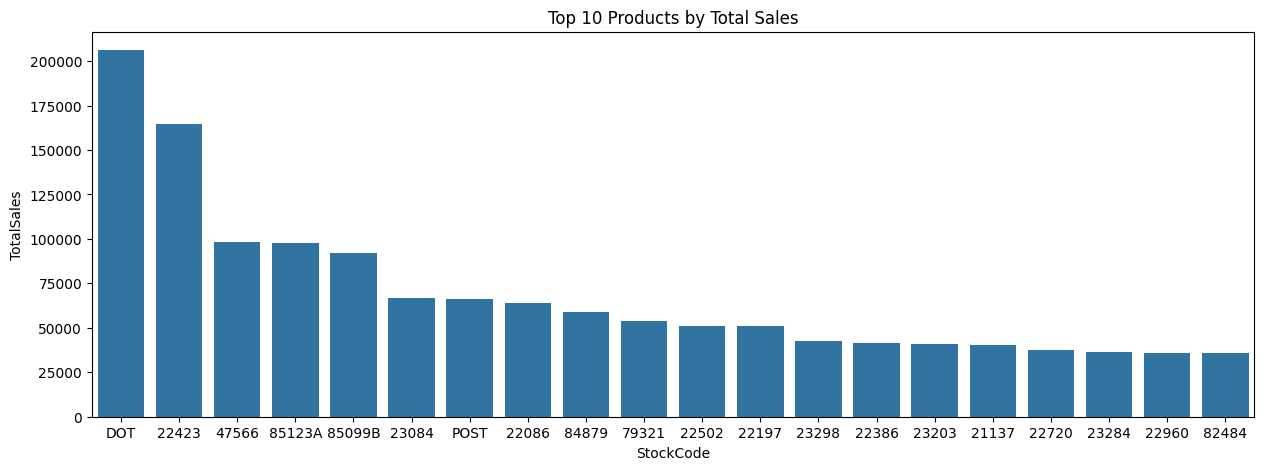

In [30]:
# Plot top 10 products by total sales
plt.figure(figsize=(15, 5))
sns.barplot(data=df_products_sorted_sales.head(20), x='StockCode', y='TotalSales')
plt.title("Top 10 Products by Total Sales")
plt.show()

In [31]:
# Products with highest quantity sold
df_products_sorted_quantity = df_products.sort_values(by='QuantitySold', ascending=False)
df_products_sorted_quantity.head(10)

,StockCode,TotalSales,AvgSales,TransactionsCount,UnitsReturned,ReturnTransactions,QuantitySold,ProductCategory,Description,UnitPrice,Return%
1112,22197,50965.37,34.741220,1467,471,50,56424,Other,SMALL POPCORN HOLDER,0.72,3.408316
2931,84077,13532.25,25.106215,539,1200,5,53655,Other,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29,0.927644
3418,85099B,92175.79,42.753149,2156,1115,44,47260,Gift-Wrap,JUMBO BAG RED RETROSPOT,1.65,2.040816
3438,85123A,97838.45,42.519970,2301,2834,42,38811,Home-Light,WHITE HANGING HEART T-LIGHT HOLDER,2.55,1.825293
3219,84879,58755.24,39.539192,1486,240,12,36100,Multi-packs,ASSORTED COLOUR BIRD ORNAMENT,1.69,0.807537
440,21212,21026.72,15.404190,1365,380,15,35979,Baking,PACK OF 72 RETROSPOT CAKE CASES,0.42,1.098901
1947,23084,66634.59,64.319102,1036,592,15,30252,Home-Light,RABBIT NIGHT LIGHT,2.08,1.447876
1377,22492,16810.42,43.103641,390,196,10,26437,Multi-packs,MINI PAINT SET VINTAGE,0.65,2.564103
1495,22616,7967.82,15.147947,526,24,2,26299,Multi-packs,PACK OF 12 LONDON TISSUES,0.29,0.380228
933,21977,12156.47,13.751663,884,101,6,24693,Baking,PACK OF 60 PINK PAISLEY CAKE CASES,0.55,0.678733


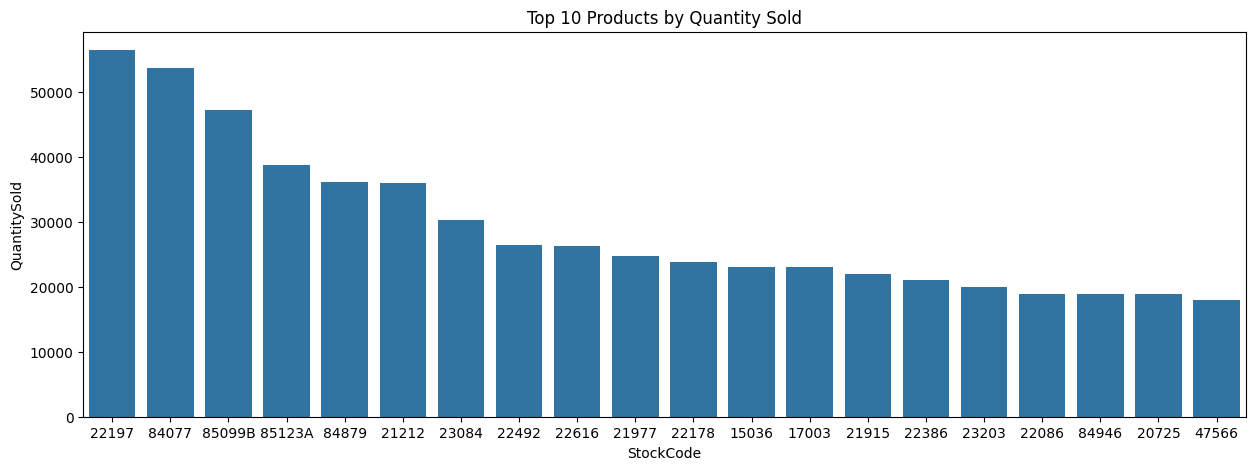

In [32]:
# Plot top 10 products by quantity sold
plt.figure(figsize=(15, 5))
sns.barplot(data=df_products_sorted_quantity.head(20), x='StockCode', y='QuantitySold')
plt.title("Top 10 Products by Quantity Sold")
plt.show()

In [33]:
# Products with highest returns
df_products_sorted_returns = df_products.sort_values(by='UnitsReturned', ascending=False)
df_products_sorted_returns.head(10)

,StockCode,TotalSales,AvgSales,TransactionsCount,UnitsReturned,ReturnTransactions,QuantitySold,ProductCategory,Description,UnitPrice,Return%
2471,23843,0.00,0.000000,2,80995,1,0,Other,"PAPER CRAFT , LITTLE BIRDIE",2.08,50.000000
2025,23166,4221.28,16.235692,260,74494,10,3539,Storage,MEDIUM CERAMIC TOP STORAGE JAR,1.04,3.846154
1872,23005,2126.13,8.607814,247,19201,1,-14468,Gift-Wrap,TRAVEL CARD WALLET I LOVE LONDON,0.42,0.404858
2964,84347,26101.43,55.891713,467,9376,4,84,Home-Light,ROTATING SILVER ANGELS T-LIGHT HLDR,2.55,0.856531
1870,23003,226.20,4.112727,55,9058,0,-8516,Gift-Wrap,TRAVEL CARD WALLET VINTAGE ROSE,0.42,0.000000
2766,72140F,0.00,0.000000,1,5368,0,-5368,Other,throw away,0.00,0.000000
2867,79323W,-54.00,-27.000000,2,4838,1,-4838,Home-Light,WHITE CHERRY LIGHTS,6.75,50.000000
168,20713,22569.63,33.436489,675,4143,6,9086,Gift-Wrap,JUMBO BAG OWLS,1.95,0.888889
3948,M,-69034.19,-121.968534,566,4066,244,2924,Other,Manual,1.25,43.109541
2681,47566B,7582.32,20.165745,376,4024,7,-345,Drinkware,TEA TIME PARTY BUNTING,8.47,1.861702


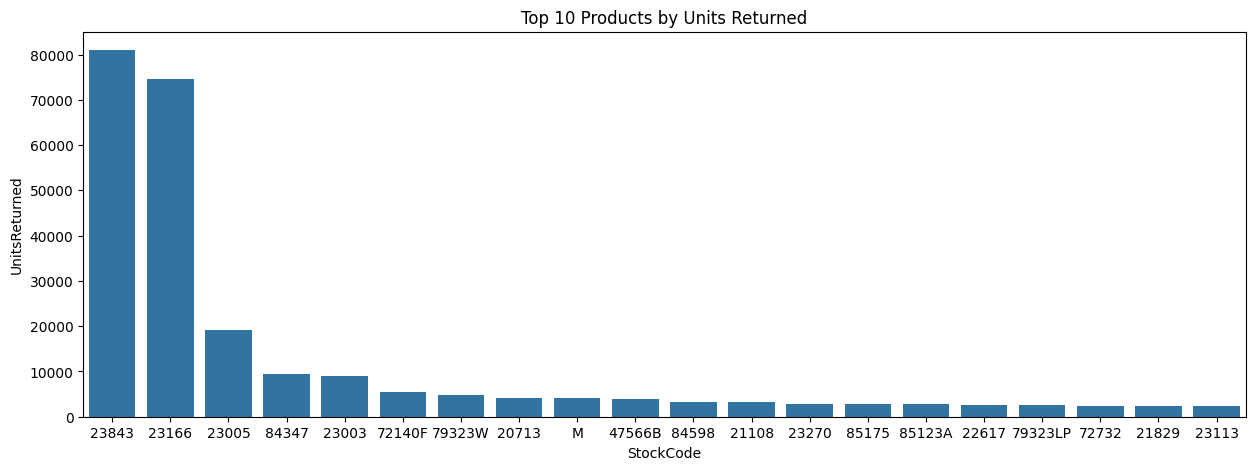

In [34]:
# Plot top 10 products by units returned
plt.figure(figsize=(15, 5))
sns.barplot(data=df_products_sorted_returns.head(20), x='StockCode', y='UnitsReturned')
plt.title("Top 10 Products by Units Returned")
plt.show()

Some of the products have negative QuantitySold. This could be due to missing purchase entries from before the start of the records. 

In [35]:
# Products with highest unit cost
df_products_unitcost = df_products.sort_values(by='UnitPrice', ascending=False)
df_products_unitcost.head(10)

,StockCode,TotalSales,AvgSales,TransactionsCount,UnitsReturned,ReturnTransactions,QuantitySold,ProductCategory,Description,UnitPrice,Return%
3932,B,-11062.06,-3687.353333,3,0,2,3,Other,Adjust bad debt,11062.06,66.666667
3947,DOT,206245.48,290.896305,709,1,1,707,Other,DOTCOM POSTAGE,569.77,0.141044
1533,22655,6394.50,136.053191,47,21,8,39,Vintage-Retro,VINTAGE RED KITCHEN CABINET,295.00,17.021277
1698,22826,5692.50,126.500000,45,4,4,54,Romance,LOVE SEAT ANTIQUE WHITE METAL,175.00,8.888889
1699,22827,5000.00,172.413793,29,3,3,32,Other,RUSTIC SEVENTEEN DRAWER SIDEBOARD,165.00,10.344828
1700,22828,1530.00,218.571429,7,0,0,10,Other,REGENCY MIRROR WITH SHUTTERS,165.00,0.000000
1695,22823,2745.00,183.000000,15,22,0,24,Other,CHEST NATURAL WOOD 20 DRAWERS,125.00,0.000000
1534,22656,2885.00,110.961538,26,6,6,20,Vintage-Retro,VINTAGE BLUE KITCHEN CABINET,125.00,23.076923
948,22016,83.33,83.330000,1,0,0,1,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£100.00,83.33,0.000000
797,21769,607.65,202.550000,3,5,0,6,Vintage-Retro,VINTAGE POST OFFICE CABINET,79.95,0.000000


In [36]:
# Price vs Return Rate analysis
fig = px.scatter(data_frame = df_products,
                 x='UnitPrice',
                 y='Return%', 
                #  color='TotalSpendings',
                 title='Unit Price vs Return Percentage',
                 log_y=False, 
                 hover_data=['StockCode', 'Description', 'ProductCategory','QuantitySold', 'UnitPrice', 'TotalSales', 'UnitsReturned', 'ReturnTransactions', 'Return%'])

fig.show()

Looking at the outlier on the graph with unit price of over 10K. Based on the description "Adjust bad debt". It seems to be a company spending cost rather than a product. Another of these values can be seen in the highest returns product plots with the description "throw away". Non-product spendings such as "POSTAGE", "DOTCOM POSTAGE" and "Manual" are also included.

In [ ]:
# Investigate outliers in price vs return rate
suspected_descriptions =["throw away", "Adjust bad debt"]
df[df['Description'].isin(suspected_descriptions)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour,Month
114448,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.00,15287,United Kingdom,-0.00,Other,Wednesday,17,3
296174,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,15287,United Kingdom,11062.06,Other,Friday,14,8
296175,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom,-11062.06,Other,Friday,14,8
296176,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom,-11062.06,Other,Friday,14,8


CustomerID: *15287* are the same as the biggest spender from previous section of customer analysis. This suggests that *CustomerID: 15387* is likely the company account or a partnering company account as they contain entries covering company costs and spendings.

In [ ]:
# Transaction history sorted by total sales
biggest_spender_products = biggest_spender_history.groupby('StockCode').agg(TotalSales=('TotalSales', 'sum'),
                                                QuantitySold=('Quantity', 'sum'),
                                                TransactionsCount=('InvoiceNo', 'nunique'),
                                                ReturnTransactions=('TotalSales', lambda x: (x < 0).sum()),
                                                Description = ('Description', 'first'),
                                                ProductCategory = ('ProductCategory', 'first')
                                                ).reset_index()
biggest_spender_products.sort_values(by='TotalSales', ascending=False)
                                        
                                    

,StockCode,TotalSales,QuantitySold,TransactionsCount,ReturnTransactions,Description,ProductCategory
3472,DOT,194339.12,691,693,1,DOTCOM POSTAGE,Other
1174,22423,31891.79,1425,288,0,REGENCY CAKESTAND 3 TIER,Baking
2435,47566,30615.45,2995,307,1,PARTY BUNTING,Decorative
880,22086,22291.46,3738,180,0,PAPER CHAIN KIT 50'S CHRISTMAS,Christmas
1117,22355,22139.30,9178,298,0,CHARLOTTE BAG SUKI DESIGN,Gift-Wrap
...,...,...,...,...,...,...,...
3475,S,-3039.65,-58,19,60,SAMPLES,Other
3460,BANK CHARGES,-7340.64,-25,25,25,Bank Charges,Other
3473,M,-10288.73,-20,105,69,Manual,Other
3459,B,-11062.06,3,3,2,Adjust bad debt,Other


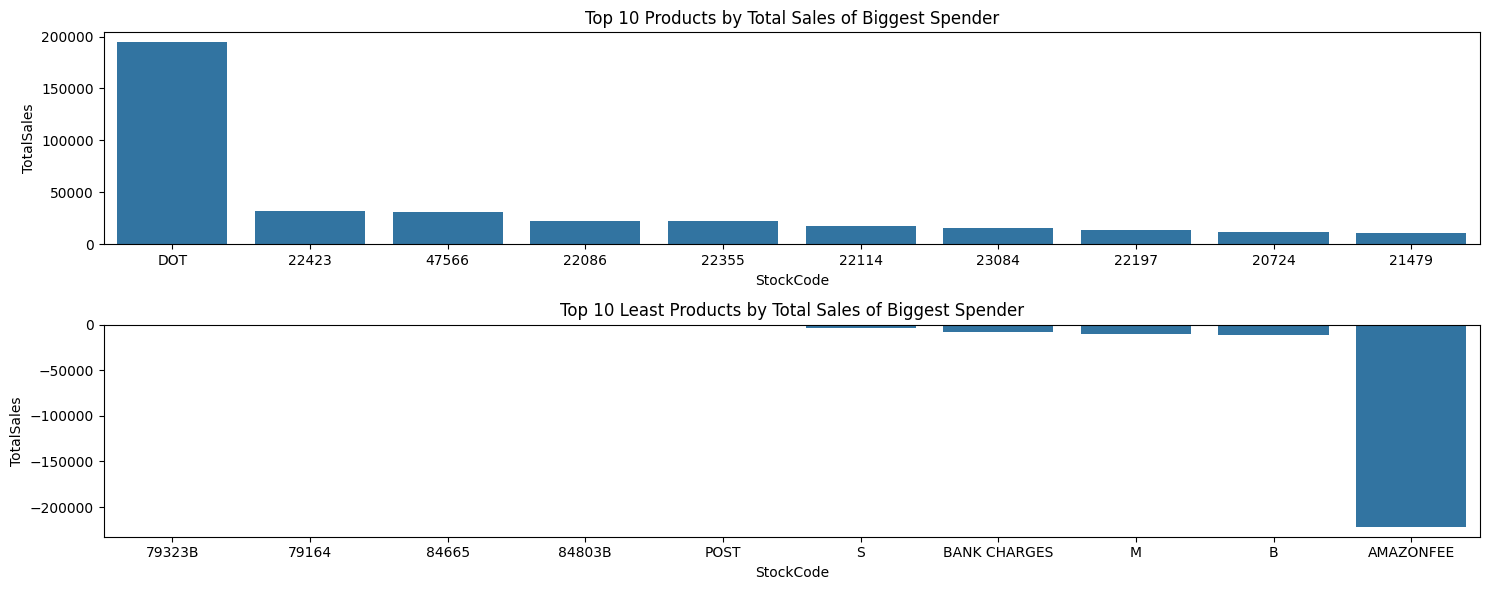

In [55]:
biggest_spender_sales = biggest_spender_products.sort_values(by='TotalSales', ascending=False)
fig, ax = plt.subplots(2, 1, figsize=(15, 6))
sns.barplot(data=biggest_spender_sales.head(10), x='StockCode', y='TotalSales', ax = ax[0])
ax[0].set_title("Top 10 Products by Total Sales of Biggest Spender")
sns.barplot(data=biggest_spender_sales.tail(10), x='StockCode', y='TotalSales', ax = ax[1])
ax[1].set_title("Top 10 Least Products by Total Sales of Biggest Spender")
plt.tight_layout()
plt.show()

This plot shows more evidence to suggestion that this is not a user as there are entries for things such as samples and bank charges. These data entries may affect the accuracy of the overall data, so it may be worth considering recording company spendings seperately in the future.

---

# Geographic Analysis

In [38]:
# Country-level analysis
df_countries = (
    df.groupby(df['Country'])
    .agg(TotalSales = ('TotalSales', 'sum'),
         AverageSales = ('TotalSales', 'mean'),
         TransactionsCount = ('InvoiceNo', 'count'),
         ReturnsCount = ('TotalSales', lambda x: (x < 0).sum()),
         UniqueCustomers = ('CustomerID', 'nunique')
         )
    .reset_index()
)

# Create return percentage column
df_countries['Return%'] = (df_countries['ReturnsCount'] / df_countries['TransactionsCount'])*100
df_countries

,Country,TotalSales,AverageSales,TransactionsCount,ReturnsCount,UniqueCustomers,Return%
0,Australia,137009.770,108.910787,1258,74,9,5.882353
1,Austria,10154.320,25.322494,401,3,11,0.748130
2,Bahrain,548.400,28.863158,19,1,3,5.263158
3,Belgium,40910.960,19.773301,2069,38,25,1.836636
4,Brazil,1143.600,35.737500,32,0,1,0.000000
5,Canada,3666.380,24.280662,151,0,4,0.000000
6,Channel Islands,20076.390,26.520991,757,10,9,1.321004
7,Cyprus,12858.760,21.045434,611,8,8,1.309329
8,Czech Republic,707.720,23.590667,30,5,1,16.666667
9,Denmark,18768.140,48.247147,389,9,9,2.313625


In [39]:
# Plot total sales by country
# Create log scale column of TotalSales
df_countries['log_TotalSales'] = np.log1p(df_countries['TotalSales'] - df_countries['TotalSales'].min() + 1)
fig = px.choropleth(df_countries,
                     locations="Country",
                     locationmode='country names',
                     color="log_TotalSales",# Use log scale for better visualization
                     color_continuous_scale="Plasma",
                     hover_name="Country",
                     title="Total Sales by Country",
                     projection="natural earth")
fig.show()

In [40]:
# Range bins for UniqueCustomers
# Create bins and labels
bins = [0, 5, 10, 25, 50, 100, 500, 1000, np.inf]
labels = [
    "1–5",
    "6–10",
    "11–25",
    "26–50",
    "51–100",
    "101–500",
    "501–1000",
    "1000+"
]

# Create a new categorical column based on the bins
df_countries["CustomerRange"] = pd.cut(
    df_countries["UniqueCustomers"],
    bins=bins,
    labels=labels,
    include_lowest=True
).astype(str) # Convert to string for better handling in plots

df_countries.head()


,Country,TotalSales,AverageSales,TransactionsCount,ReturnsCount,UniqueCustomers,Return%,log_TotalSales,CustomerRange
0,Australia,137009.77,108.910787,1258,74,9,5.882353,11.826864,6–10
1,Austria,10154.32,25.322494,401,3,11,0.748130,9.212852,11–25
2,Bahrain,548.40,28.863158,19,1,3,5.263158,6.038420,1–5
3,Belgium,40910.96,19.773301,2069,38,25,1.836636,10.615991,11–25
4,Brazil,1143.60,35.737500,32,0,1,0.000000,6.922082,1–5


Countries are given a CoustomerRange value based on their number of unique customers. This alows a discrete color scale to be used for better visualisation. In a continuous scale, the large value of customers from the UK prevent meaningful visualisation of other countries.

In [41]:
# Plot unique customer ranges by country
fig = px.choropleth(df_countries,
                     locations="Country",
                     locationmode='country names',
                     color="CustomerRange",
                     color_discrete_sequence=px.colors.qualitative.Set2_r, # Discrete color scale for categorical data
                     hover_name="Country",
                     title="Unique Customer Ranges by Country",
                     category_orders={"CustomerRange": labels}, # Ensure correct order of categories
                     projection="natural earth")
fig.show()

---

# Conclusions

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.